In [ ]:
# # Import tensorflow into colob
# import tensorflow as tf
# print("TF version:", tf.__version__)

In [ ]:
# # If this don't work out :
# try :
#   # %tensorflow_version only exists in Colab
#   %tensorflow_version 2.x
# except Exception:
#   pass

In [ ]:
#  Import necessary tools.
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF_hub version:", hub.__version__)


# Check for GUP availability
print('GPU', 'available (YESS)' if tf.config.list_physical_devices('GPU') else 'not available fuck!')

TF version: 2.2.0-rc2
TF_hub version: 0.8.0
GPU available (YESS)


In [ ]:
# Check out the labels of our data
import pandas as pd
labels_csv = pd.read_csv('/content/drive/My Drive/Dog Vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     02f07e7e51662336a9d8c775a4eac5f4  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# How many images are there of each bread?
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

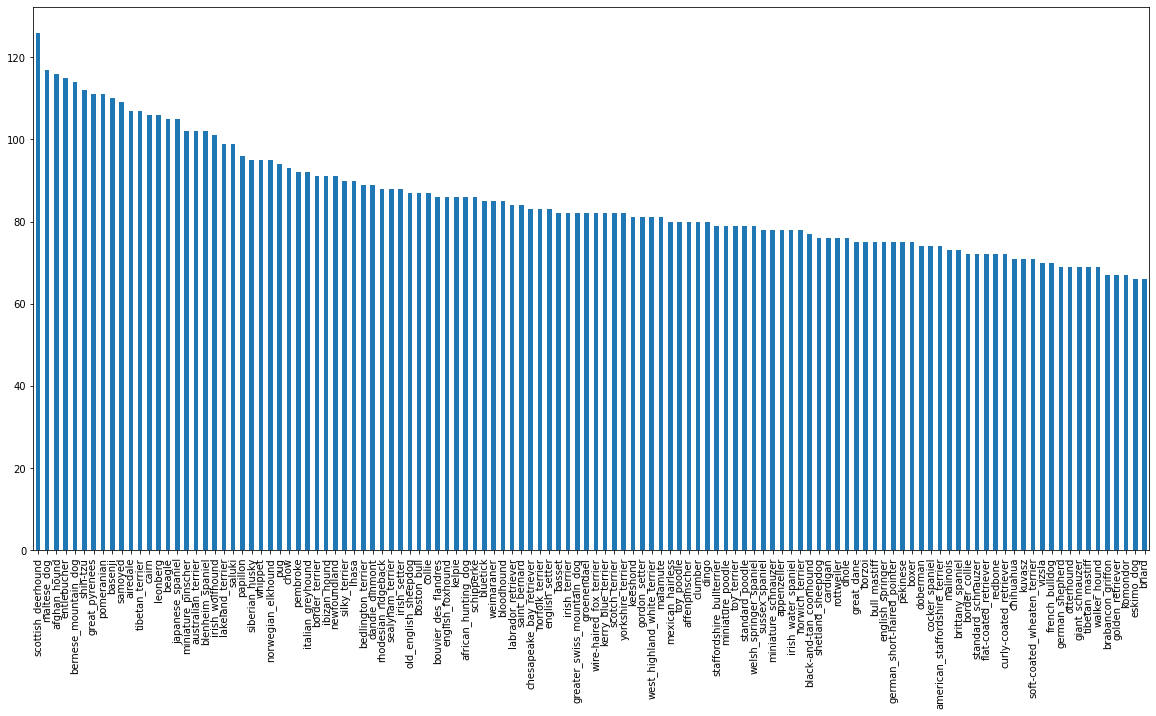

In [ ]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
# Find mean of the columns
labels_csv['breed'].value_counts().median()

82.0

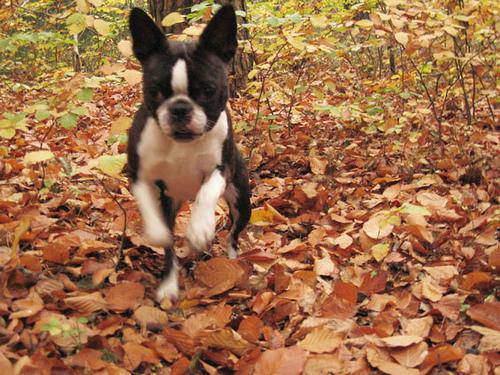

In [ ]:
# Let's view an image
from IPython.display import Image
Image("/content/drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# Create pathnames for images ID's
filename = ["/content/drive/My Drive/Dog Vision/train/" + fname + '.jpg' for fname in labels_csv['id']]

# Check the first 10
filename[:10]
print(len(filename))

10222


In [ ]:
filename[0]

'/content/drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg'

In [ ]:
import os
len(os.listdir("/content/drive/My Drive/Dog Vision/train/"))

10222

In [ ]:
# Check wheather number of filenames matches number of actual images files in traning data set
import os
if len(os.listdir('/content/drive/My Drive/Dog Vision/train/'))  == len(filename):
  print('Filenames matches actual amount of files!!! Proceed.')
else:
  print('Filenames donot match actual amount of files, check the target directory.')

Filenames matches actual amount of files!!! Proceed.


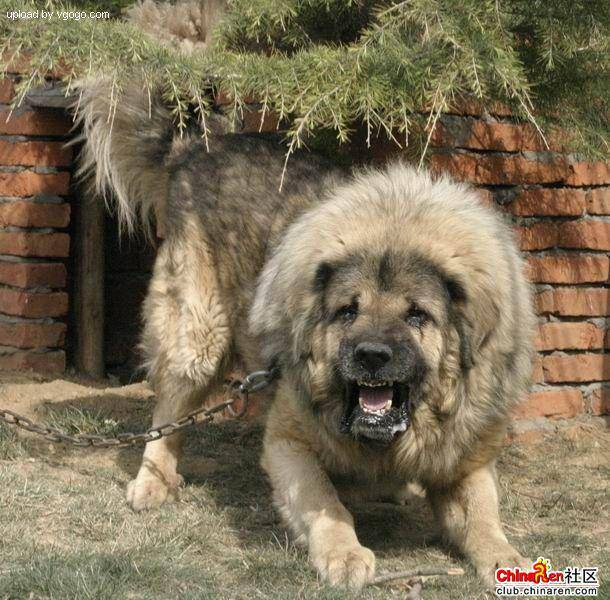

In [ ]:
Image(filename[9000])

In [ ]:
labels_csv['breed'][9000]

'tibetan_mastiff'

Since we've got not our traning image filepath in a list, let's prepare out labels.

In [ ]:
import numpy as np
labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# See if numbers of labels matches the number if filenames
'Number of labels matches number of filenames!' if len(labels) == len(filename) else 'Not matched!'

'Number of labels matches number of filenames!'

In [ ]:
# Find the unique labels values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
len(labels)

10222

In [ ]:
# Trun a single label into a array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Trun every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:10]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: Truning boolean array into integers
print(labels[0]) # Original labels
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2]) # index where label occurs in boolean array
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
filename[:10]

['/content/drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Setup X and y variables
X = filename # Filepaths
y = boolean_labels # Boolean values

We're going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:'slider', min:1000, max:10000, steps:1000}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into traning and validation of total size NUM_IMAGES
X_train, X_val , y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                   y[:NUM_IMAGES],
                                                   test_size=0.2,
                                                   random_state=42 # same as np.random.seed(42)
                                                   )
len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a geez at the traning data
X_train[:5], y_train[:2]

(['/content/drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
        

In [ ]:
# Convert image into NumPy array
from matplotlib.pyplot import imread
image = imread(filename[42])
image.shape

(257, 350, 3)

In [ ]:
image.max() , image.min()

(255, 0)

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
# Trun image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, Let's make a function to preprocessing them.

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an imgae file path and truns the image into Tensor,
  """
  # Read the image file
  image = tf.io.read_file(image_path)

  # Trun the jpg image into numrical Tensor with 3 color channels, (Red, green , blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channel values from 0-255 to 0-1 values (normalization)
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value(224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
# Create a simple function to return a tuple(image, label)
def get_image_label(image_path, label):
  """
  Take an image filepath and the associated label,
  processes that image and return the tuples
  """
  image = process_image(image_path)
  return image, label

In [ ]:
get_image_label(X_val[0], y_val[0])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 

In [ ]:
(process_image(X[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we're got a way to turn our data into tuples of Tensors in the form: `(image, label)` , let's make a function to turn all
our data (`X`, `y`) into batches!

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image (X) and label (y) pairs.
  Shuffles the data of it's traning data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """

  # If the data is a test dataset, we probably dont' have labels.
  if test_data:
    print('Creating test data batches....')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only filepath no labels
    data_batch = data.map(process_image).batch(BATCH_SIZE) # split the test data into 32 batches
    return data_batch

  # If the data is valid dataset, we don't need to shuffle it
  elif valid_data:
    print('Creating validation data batches ')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print('Create traning data batches...')
    # Turn filepath and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))

    # Shuffling pathname and labels before mapping image processor function is faster than shuffling the images.
    data = data.shuffle(buffer_size=(len(X)))

    # Create (image, label) tuple (this also trun the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Trun the traning data into batches
    data_batch = data.batch(BATCH_SIZE)

    return data_batch

Function def create_data_batches:
1. If test_data:

    * First we have to change the test   data into the tensorflow dataset. (data = tf.data.Dataset.from_tensor_slices((tf.constant(X)).
    * Second we have to call the function process_image for the numrical value of test data aka images. Means call the process_image for batch size times. (data_batch = data.map(process_image).batch(BATCH_SIZE))
    * Return the batch data. (data_batch)

2. If the data iis a valid dataset, we don't have to shuffle it.
    
    * Create a tensorflow dataset. As the validation set have both features and labels we have to create the tfdataset contaning both featrues and labels. ie data = tf.data.Dataset.from_tensor.slices((tf.constant(X), tf.constant(y))).
    * Again map the data to get_image_label because we need the tuple of (image, label). (data_batch = data.map(get_image_label).batch(BATCH_SIZE))
    * Return  the data_batch.


3. Traning data:

    * We have to shuffel the data. It is better to shuffel the data when it is a filename and labels because it is faster than suffling the image.(data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))))
    * Shuffle the data. data = data.shuffle(buffer_size=(len(X)))
    * Create (image, label) tuple (this also trun the image path into a preprocessed image)
    data = data.map(get_image_label)
    * Trun the traning data into batches
    data_batch = data.batch(BATCH_SIZE)
    * Return data_batch

In [ ]:
# Create traning and validation data batches
train_data = create_data_batches(X_train, y_train) # calling function create_data_batches(X=X_train, y=y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Create traning data batches...
Creating validation data batches 


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec , val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Display a plot of 25 images and their labels from a data batch.
  """
  # Setpup the figure
  plt.figure(figsize=(10,10))

  # Loop through 25 (for diaplaying 25 images)
  for i in range(25):
    # Create suplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)

    # Display an images
    plt.imshow(images[i])

    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])

    # Trun the grid lines off
    plt.axis('off')

In [ ]:
# Our data is batched so we have to unbatch it to visualize it.
train_images, train_labels = next(train_data.as_numpy_iterator())



In [ ]:
len(train_images), len(train_labels)

(32, 32)

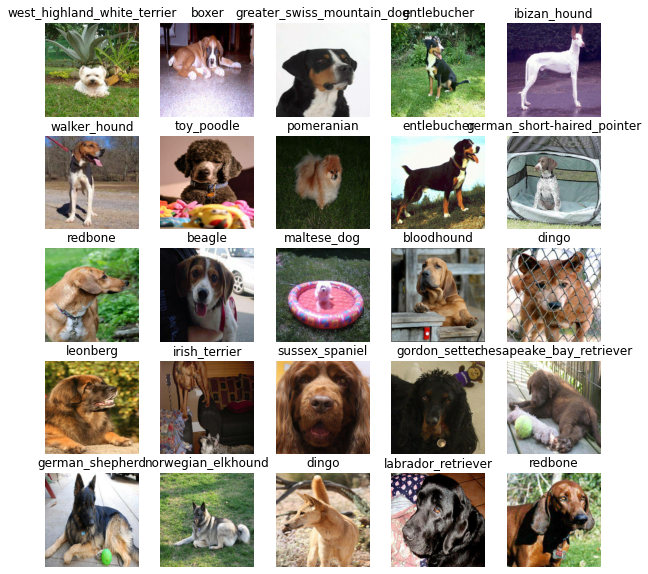

In [ ]:
# Now lets visualize the data in training data
show_25_images(train_images, train_labels)

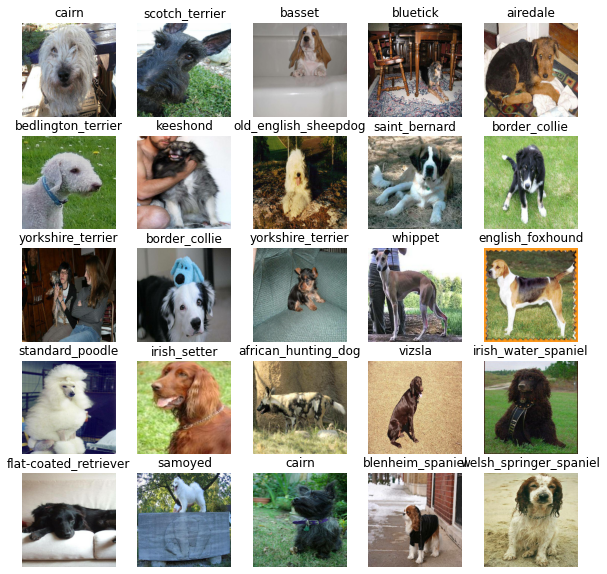

In [ ]:
# Now let's visulize the validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width , color channels

# Setup output shape of our model.
OUTPUT_SHAPE = len(unique_breeds)

# Setup model urls form TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
# Create a fuction which build a Keras model.
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url = MODEL_URL):
  print('Building the model with :' , model_url)

  # Setup the model layers
  model = tf.keras.Sequential([
            hub.KerasLayer(model_url),
            tf.keras.layers.Dense(units=output_shape,
                                  activation='softmax' # Layer 2 (output layer with activation function)
                                  )
  ])

  # Compile the model
  model.compile(
      loss= tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model
  model.build(input_shape)

  return model

In [ ]:
model = create_model()
model.summary()

Building the model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
# Load Tensor notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():

  # Create a log directory for storing the tensor board log.
  logdir = os.path.join("/content/drive/My Drive/Dog Vision/logs",
                        # Make it so the log gets tracked whenever we run an experiment.
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
                        )
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Create early stooping  callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Cheack to make sure we're still running on a GPU
print('GPU', "available" if tf.config.list_physical_devices('GPU') else 'Not availabel')

GPU available


Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tenmsorboard_callback()`
* Call the `fit()` function on our model passing it the traning data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we'd like to use
* Return

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """

  # create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the dta passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping]
            )

  # Return the fitted model

  return model


In [ ]:
# Fit the model to the data.
model = train_model()


Building the model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 347s 14s/step - loss: 4.6334 - accuracy: 0.0950 - val_loss: 3.6042 - val_accuracy: 0.2050
Epoch 2/100
25/25 [==============================] - 5s 182ms/step - loss: 1.6681 - accuracy: 0.6750 - val_loss: 2.2728 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 5s 182ms/step - loss: 0.5772 - accuracy: 0.9300 - val_loss: 1.7219 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 5s 184ms/step - loss: 0.2579 - accuracy: 0.9887 - val_loss: 1.5130 - val_accuracy: 0.6350
Epoch 5/100
25/25 [==============================] - 5s 181ms/step - loss: 0.1476 - accuracy: 0.9975 - val_loss: 1.4423 - val_accuracy: 0.6150
Epoch 6/100
25/25 [==============================] - 5s 184ms/step - loss: 0.1002 - accuracy: 1.0000 - val_loss: 1.4124 - val_accuracy: 0.6350
Epoch 7/100
25/25 [=========================

**Question:** It looks like our model is overfitting because it's performing far better than traning dataset then validationdata set what are the ways to prevnet model overfitting in deeplearnig neuralnetworks.


**Note:** Overfitting to being with is a good things ! It's mean our model is learning.


### Checking the TensorBoard log.

The TensorBoard magic function (`%tensorboard`) will access the log directory we created earlier and visualize its content

In [ ]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

## Making and evaluating prediciton using trained model.

In [ ]:
# Make prediction on the validation data (not used to train on )
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 126ms/step


array([[1.7625125e-03, 3.6457228e-04, 8.7518204e-04, ..., 1.6703906e-03,
        2.1458471e-05, 1.0101796e-02],
       [1.8524976e-03, 4.5883347e-04, 5.8691883e-03, ..., 8.0352835e-04,
        2.6021004e-04, 2.4122180e-04],
       [3.6586059e-06, 2.2434710e-05, 4.8815450e-06, ..., 2.9235846e-06,
        1.8587891e-05, 2.8859038e-05],
       ...,
       [6.1133551e-06, 1.6428714e-05, 2.9938425e-05, ..., 4.0323066e-05,
        4.5730860e-05, 1.0050672e-05],
       [1.3494026e-03, 9.0708534e-05, 3.5261743e-05, ..., 1.0310129e-04,
        5.5870536e-05, 2.6339090e-03],
       [3.0503618e-03, 2.7279350e-05, 6.8024197e-04, ..., 1.2914833e-03,
        3.0970789e-04, 2.9598863e-04]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
y_val[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
len(unique_breeds)

120

In [ ]:
np.sum(predictions[0])

0.9999999

In [ ]:
np.sum(predictions[1])

1.0

### Prediction with val_data

In [ ]:
# First predictions
index = 0
print(predictions[0])
print(f'Max value (probability of prediction): {np.max(predictions[0])}')
print(f'Sum:{np.sum(predictions[0])}')
print(f'Max index:{np.argmax(predictions[index])}')
print(f'Predicted Label:{unique_breeds[np.argmax(predictions[index])]}')

[1.76251249e-03 3.64572275e-04 8.75182042e-04 1.34640999e-04
 1.97877744e-04 3.48065660e-05 6.47614598e-02 5.17906446e-04
 1.04003317e-04 1.35191705e-03 6.36229233e-04 8.08572440e-05
 2.08496160e-04 2.57773994e-04 3.63247207e-04 2.79434753e-04
 4.87332400e-05 8.99499878e-02 4.52000968e-05 1.64837897e-04
 1.27575814e-03 3.56769102e-04 7.98052497e-05 2.72498070e-03
 8.02208888e-05 1.67849546e-04 2.72757292e-01 1.52461202e-04
 7.52629072e-04 1.31418230e-04 3.74159048e-04 1.98455947e-03
 2.73906684e-04 1.96746932e-05 4.01336554e-04 1.86930466e-02
 2.15591845e-05 2.95826554e-04 7.91103157e-05 1.72947592e-04
 3.00173811e-03 6.14745950e-05 1.81680429e-04 2.45417410e-04
 1.04481533e-05 1.56818442e-05 1.61658354e-05 3.84955085e-04
 2.27626035e-04 5.64447662e-04 3.30682669e-04 1.38678108e-04
 1.92701991e-04 1.03885199e-04 1.98036796e-05 5.03260126e-05
 1.08604509e-04 1.96843594e-03 9.53526644e-04 1.25242636e-01
 1.44051766e-04 4.96106986e-05 1.40490616e-03 3.29527429e-05
 4.99056478e-04 4.485688

In [ ]:
# Example: Truning boolean array into integers
print(labels[0]) # Original labels
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
unique_breeds[y_val[0].argmax()]

'cairn'

In [ ]:
# Creating a function for the better visualization
def outputlabel(arrayLabel):

  """
  Takes arguments of output label data.

  """
  OutputLabelList = []
  for i in range(0, len(arrayLabel)):
    OutputLabel = unique_breeds[arrayLabel[i].argmax()]
    OutputLabelList.append(OutputLabel)
  return OutputLabelList


In [ ]:
# To compare the prediction and real values
def compareOutputvalues(predictions, OutputLabels):
  """
  Compare the predicted values form the models and real values.
  args(predictions, OutputLabels)
  """
  for i in range(0, 5): #len(OutputLabels)
    print(f'Max value (probability of prediction): {np.max(predictions[i])}')
    print(f'Predicted values:{unique_breeds[np.argmax(predictions[i])]} and Real value: {OutputLabel[i]}')
    print("")

In [ ]:
# Importing the X_test data
DIR = '/content/drive/My Drive/Dog Vision/test/'
files = [DIR + name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))][:200]

In [ ]:
X_train = files # Remember we need the file path as the for the prediction.

In [ ]:
# Conversion into the batches of 32.

test_data = create_data_batches(X_train, test_data=True)
test_data.element_spec

In [ ]:
predictions_1 = model.predict(test_data, verbose=0)

In [ ]:
for i in range(0, len(files)):
  print(f'Max value (probability of prediction): {np.max(predictions_1[i])}')
  print(f'Predicted values:{unique_breeds[np.argmax(predictions_1[i])]}')
  print("")

Max value (probability of prediction): 0.5021728873252869
Predicted values:chesapeake_bay_retriever

Max value (probability of prediction): 0.5985680222511292
Predicted values:scotch_terrier

Max value (probability of prediction): 0.34226223826408386
Predicted values:shih-tzu

Max value (probability of prediction): 0.2499992549419403
Predicted values:norwich_terrier

Max value (probability of prediction): 0.4083278775215149
Predicted values:malinois

Max value (probability of prediction): 0.716524600982666
Predicted values:chesapeake_bay_retriever

Max value (probability of prediction): 0.6749811172485352
Predicted values:bouvier_des_flandres

Max value (probability of prediction): 0.8040671348571777
Predicted values:scottish_deerhound

Max value (probability of prediction): 0.938626766204834
Predicted values:collie

Max value (probability of prediction): 0.21369117498397827
Predicted values:malinois

Max value (probability of prediction): 0.1490781456232071
Predicted values:curly-coat

Having the above functionality is great but we want to be able to do it at scale.
And it would be bettwe if we could see the image the prediction is being made on !
**Note**: Prediction probabilities are also known as confidence levels.

In [ ]:
# Trun prediction probabilites into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Truns an array of prediction probabilites into a label.
  """
  return unique_breeds[prediction_probabilities.argmax()]

# Get a predicted label based on an array of prediction probabilites
preds_label = get_pred_label(predictions[0])

In [ ]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

Now since our validation data is still in a batch datasets.
We'll have to unbatchify it to make predictions on the validation image and then compare those prediction to the validation labels (truth  labels)

In [ ]:
# Create a function to unbatch a batched datasets

def unbatchify(data):
  """
  Takes a batched dateset of (image, label) Tenosors and returns separate arrays of image and labels.
  """

  images= []
  labels = []

  # Loop througth batched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[label.argmax()])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)

Now we've got ways to get:
* Predictions labels
* Validation labels (truth labels)
* validation images

Let's make some function to make these all a bit more

We'll create a function which :
* Takes an array of prediction probabilities , and array of truth labels and an array of images and integers.
* Convert the predicition paobabilities to a predicted label.
* Plot the predicted label, its predicted probability, th truth label and the target image on a single plot

In [ ]:
def plot_preds(prediction_probabilities, labels, images, n= 1):
  """
  View the prediction , ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title('Predicted:{} Accuracy:{:2.0f}% \nTrue Label:{}'.format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

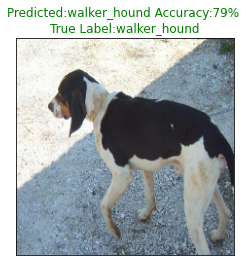

In [ ]:
plot_preds(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images, n=31)

Now we've got one function to visualize our model top prediction, let's make another to view our models top 10 predictions

The function will :
* Take an input of prediction probabilities array and a grounf truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilites indexes.
  * Prediction probabilites values.
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.


In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n =1 ):
  """
  Plus the top 10 highest prediction confidence along with the truth label for sample n.
  """

  # Get the predicted label
  preds_probs, true_label = prediction_probabilities[n], labels[n]

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = preds_probs.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values= preds_probs[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plots
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
                       labels = top_10_pred_labels,
                       rotation='vertical')
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass

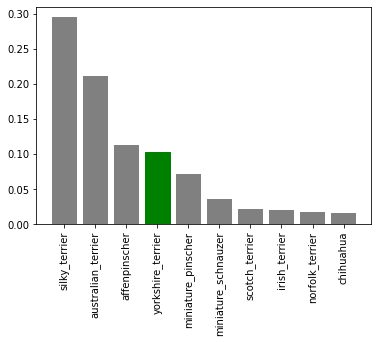

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=12)

Now we've got some function to help us visulize our prediction and evaluate our model, let's check out a few.

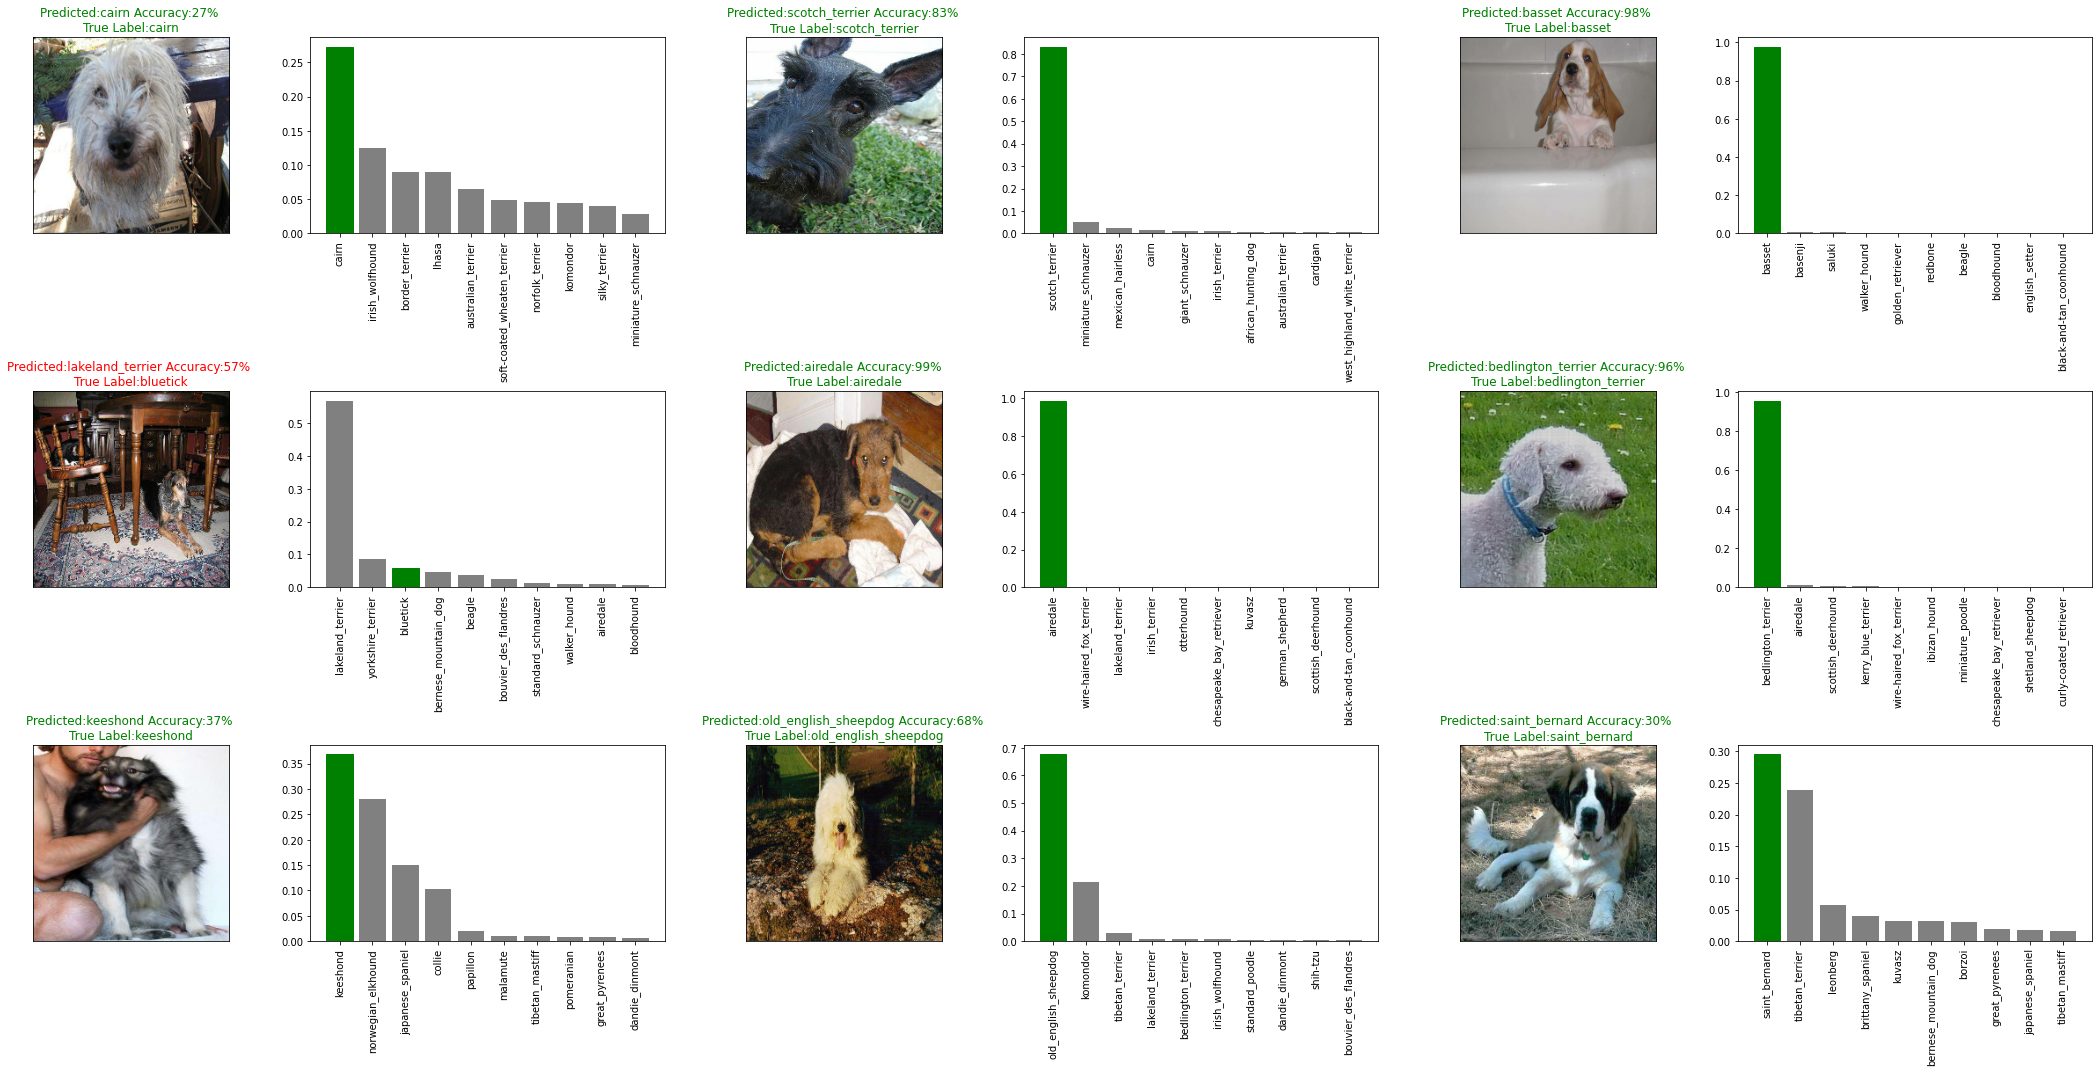

In [ ]:
# Let's check out a few prediction and their different values
i_multipier = 0
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_preds(prediction_probabilities=predictions,
            labels=val_labels,
            images = val_images,
            n = i+i_multipier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multipier)
  plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading the model.

In [ ]:
 # Create a function to save model
 def save_model(model, suffix=None):
   """
   Saves a given model in a models directory and append a suffix (string)
   """

   # Create a model directory pathname with current time
   modeldir = os.path.join('/content/drive/My Drive/Dog Vision/models',
                           datetime.datetime.now().strftime('%Y%m%d-%H%m%s'))
   model_path = modeldir + '-' +suffix + 'h5' # Save a model
   print(f'Saving model to : {model_path}..')
   model.save(model_path)
   return model_path

In [ ]:
# create a function to load a model
def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f'Loading saved model form : {model_path}')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={'KerasLayer': hub.KerasLayer})

  return model

Now we've got functions to save and load a trained model, let's make sure they work!

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix='1000-images-mobilenetv2-Adam')

Saving model to : /content/drive/My Drive/Dog Vision/models/20200411-12041586608998-1000-images-mobilenetv2-Adamh5..
INFO:tensorflow:Assets written to: /content/drive/My Drive/Dog Vision/models/20200411-12041586608998-1000-images-mobilenetv2-Adamh5/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Dog Vision/models/20200411-12041586608998-1000-images-mobilenetv2-Adamh5/assets


'/content/drive/My Drive/Dog Vision/models/20200411-12041586608998-1000-images-mobilenetv2-Adamh5'

In [ ]:
# Load a trained model
loaded_image_model = load_model('/content/drive/My Drive/Dog Vision/models/20200411-12041586608998-1000-images-mobilenetv2-Adamh5')

Loading saved model form : /content/drive/My Drive/Dog Vision/models/20200411-12041586608998-1000-images-mobilenetv2-Adamh5


In [ ]:
loaded_image_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   multiple                  5432713   
_________________________________________________________________
dense_1 (Dense)              multiple                  120240    
Total params: 5,552,953
Trainable params: 5,508,697
Non-trainable params: 44,256
_________________________________________________________________


In [ ]:
# Evaluate the pre_saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 105ms/step - loss: 1.2643 - accuracy: 0.6650


[1.2642725706100464, 0.6650000214576721]

In [ ]:
# Evaluate the loaded model
loaded_image_model.evaluate(val_data)

7/7 [==============================] - 1s 113ms/step - loss: 1.3905 - accuracy: 0.6650


[1.3905330896377563, 0.6650000214576721]

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
X[:10]

['/content/drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Create traning data batches...


In [ ]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [ ]:
# Create model for fullmodel
full_model = create_model()

Building the model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when traning on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

**Note:** Runnig the cell below will take a little whie ( maybe up to 30 min for the first epoch) because the GUP we're using in the runtime has to laod all the data)

In [ ]:
# Fit the full model to the trainig set
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 1058s 3s/step - loss: 0.5047 - accuracy: 0.8507
Epoch 2/100
320/320 [==============================] - 46s 145ms/step - loss: 0.2777 - accuracy: 0.9203
Epoch 3/100
320/320 [==============================] - 47s 146ms/step - loss: 0.1780 - accuracy: 0.9556
Epoch 4/100
320/320 [==============================] - 46s 145ms/step - loss: 0.1202 - accuracy: 0.9734
Epoch 5/100
320/320 [==============================] - 46s 144ms/step - loss: 0.0843 - accuracy: 0.9842
Epoch 6/100
320/320 [==============================] - 46s 145ms/step - loss: 0.0625 - accuracy: 0.9907
Epoch 7/100
320/320 [==============================] - 47s 145ms/step - loss: 0.0496 - accuracy: 0.9939
Epoch 8/100
320/320 [==============================] - 46s 144ms/step - loss: 0.0403 - accuracy: 0.9956
Epoch 9/100
320/320 [==============================] - 46s 144ms/step - loss: 0.0329 - accuracy: 0.9964
Epoch 10/100
320/320 [==============================] - 46s 145ms

In [ ]:
save_model(full_model, suffix='full-image-set-mobilenetv2-Adam')

Saving model to : /content/drive/My Drive/Dog Vision/models/20200411-15041586618358-full-image-set-mobilenetv2-Adamh5..
INFO:tensorflow:Assets written to: /content/drive/My Drive/Dog Vision/models/20200411-15041586618358-full-image-set-mobilenetv2-Adamh5/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Dog Vision/models/20200411-15041586618358-full-image-set-mobilenetv2-Adamh5/assets


'/content/drive/My Drive/Dog Vision/models/20200411-15041586618358-full-image-set-mobilenetv2-Adamh5'

In [ ]:
loaded_image_model = load_model('/content/drive/My Drive/Dog Vision/models/20200411-12041586608998-1000-images-mobilenetv2-Adamh5')